# New API data pull and process playland
Rebuilding API process ...

In [1]:
import pandas as pd
import numpy as np
import requests
import os

# get current directory
path = os.getcwd()
# get directory of the latest data location
dir_data = os.path.abspath(os.path.join(path, os.pardir)) + "/data/apinhle/"

In [2]:
iter_year = 2023 # Start with season start

Pull team box score

In [3]:
df_kpi = pd.read_csv(dir_data + "/latest/2023_box_team_season.csv", index_col='team_tri_for')

## Visualization - Performance Expectation and Team Performance

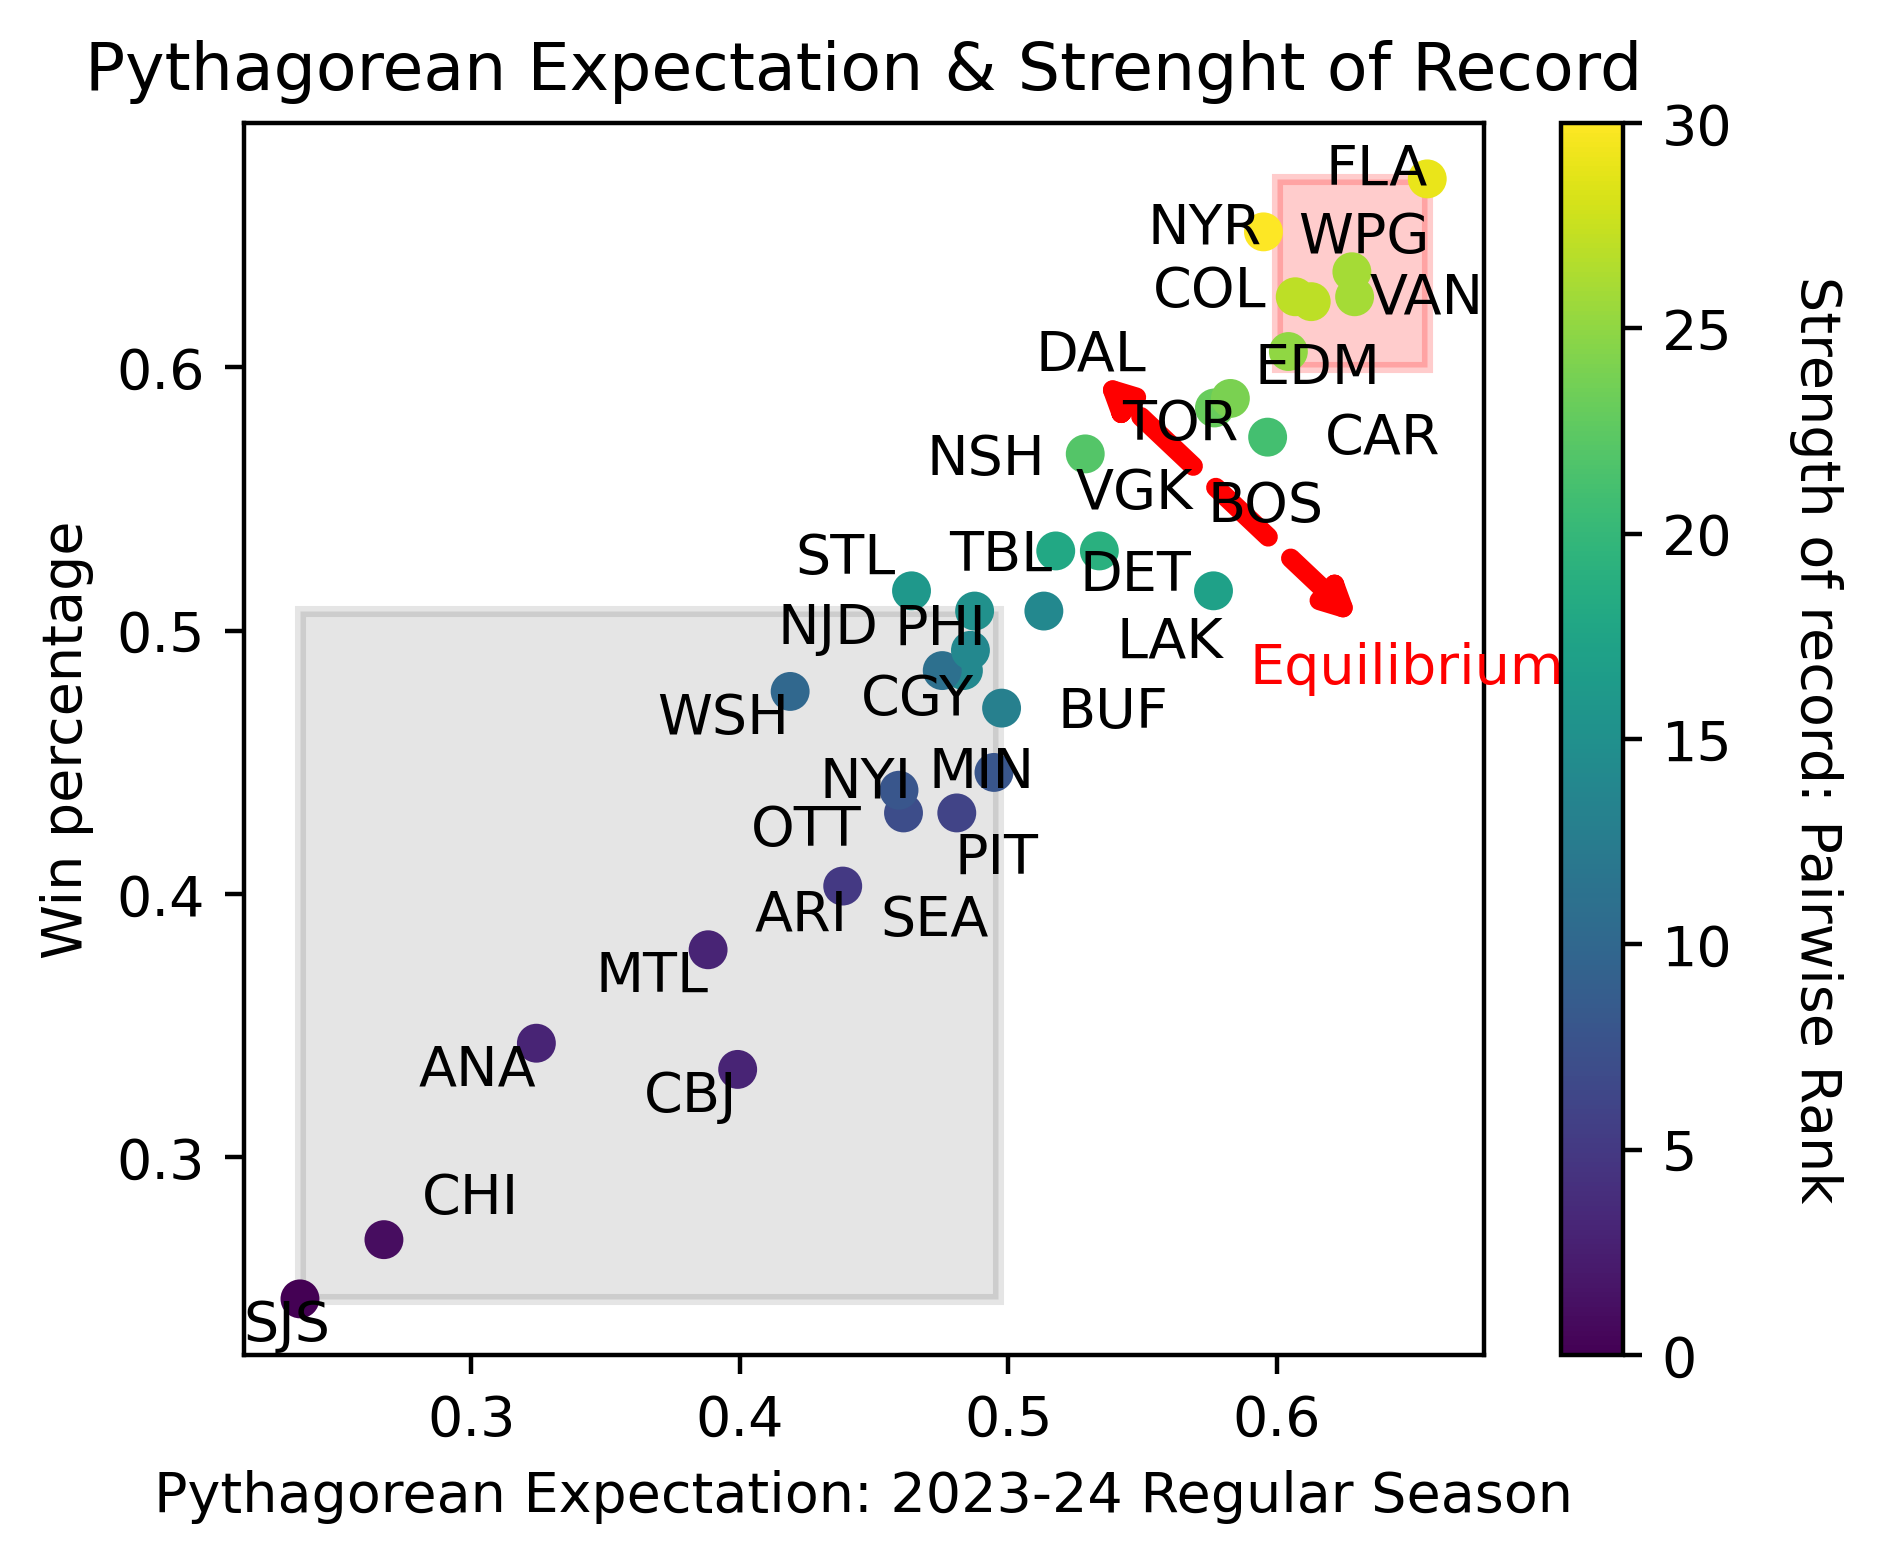

In [9]:
# Vector of min
x_min = np.min(df_kpi['rpe'])
x_max = np.median(df_kpi['rpe'])
y_min = np.min(df_kpi['wp'])
y_max = np.median(df_kpi['wp'])
x_max_super = np.max(df_kpi['rpe'])
y_max_super = np.max(df_kpi['wp'])

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator
from adjustText import adjust_text

# Plot configuration
fig = plt.figure(figsize=(5,4), dpi=400)
ax = plt.gca()
# Line plot for cutoff annotation
plt.annotate('Equilibrium', xy=(0.53, 0.6),
             xycoords='data',
             xytext=(0.59, 0.48),
             textcoords='data',
             color='red',
             arrowprops=dict(arrowstyle= '<|-|>',
                             color='red',
                             lw=3.5,
                             ls='--')
           )
# Point out the cutoff regions
emph1 = plt.Rectangle((x_min, y_min), (x_max-x_min), (y_max-y_min), facecolor="black", alpha = 0.1, ec = 'k', lw=2)
emph2 = plt.Rectangle((0.6, 0.6), (x_max_super-0.6), (y_max_super-0.6), facecolor="red", alpha = 0.2, ec = 'r', lw=2)
ax.add_patch(emph1)
ax.add_patch(emph2)
# Plot the data
plt.scatter(df_kpi['rpe'], df_kpi['wp'], c = df_kpi['pairwise_win'])
# Color bar annotation
cbar = plt.colorbar()
cbar.set_label('Strength of record: Pairwise Rank', rotation = 270, labelpad = 20)
# Labeling
plt.xlabel(f"Pythagorean Expectation: {iter_year}-{iter_year-2000+1} Regular Season")
plt.ylabel("Win percentage")
plt.title("Pythagorean Expectation & Strenght of Record")
# Adding team label annotation
iter_teams = []
for i, txt in enumerate(df_kpi.index):
    iter_teams.append(
        ax.annotate(
            txt, (df_kpi['rpe'][i], df_kpi['wp'][i])
        )
    )
# Adjust text location
adjust_text(iter_teams)
#plt.xlim([0.3, 0.8])
#plt.ylim([0.6, 1.2])


# Save figure
plt.savefig("./latest/plot_PEnSoR.png")